<a href="https://colab.research.google.com/github/Victor1e/Personal-projects/blob/main/PROPHET_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [6]:
!pip install pystan
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 5.7 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [7]:
import pandas as pd
from prophet import Prophet

## **1. Read in Data and Process Dates**

In [9]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [10]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

In [11]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [12]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [13]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# **2. Train Model**

In [14]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpr0wtr6lx/y1w2wonv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr0wtr6lx/2mzb5tuq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32276', 'data', 'file=/tmp/tmpr0wtr6lx/y1w2wonv.json', 'init=/tmp/tmpr0wtr6lx/2mzb5tuq.json', 'output', 'file=/tmp/tmpgex1xczu/prophet_model-20221005091033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **3. Forecast away**

In [15]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.070476,804.144713,3996.249555,3041.070476,3041.070476,-642.519352,-642.519352,-642.519352,466.57542,...,16.623819,16.623819,16.623819,-1125.718591,-1125.718591,-1125.718591,0.0,0.0,0.0,2398.551124
1,2018-01-02,3041.848842,685.791547,3993.586211,3041.848842,3041.848842,-652.648904,-652.648904,-652.648904,466.57542,...,-11.281075,-11.281075,-11.281075,-1107.943248,-1107.943248,-1107.943248,0.0,0.0,0.0,2389.199937
2,2018-01-03,3042.627207,922.049384,3813.815988,3042.627207,3042.627207,-626.822675,-626.822675,-626.822675,466.57542,...,-4.411502,-4.411502,-4.411502,-1088.986593,-1088.986593,-1088.986593,0.0,0.0,0.0,2415.804532
3,2018-01-04,3043.405573,884.368220,4127.065420,3043.405573,3043.405573,-579.864732,-579.864732,-579.864732,466.57542,...,22.484584,22.484584,22.484584,-1068.924735,-1068.924735,-1068.924735,0.0,0.0,0.0,2463.540841
4,2018-01-05,3044.183939,864.479536,4123.975603,3044.183939,3044.183939,-615.887354,-615.887354,-615.887354,466.57542,...,-34.576305,-34.576305,-34.576305,-1047.886469,-1047.886469,-1047.886469,0.0,0.0,0.0,2428.296585


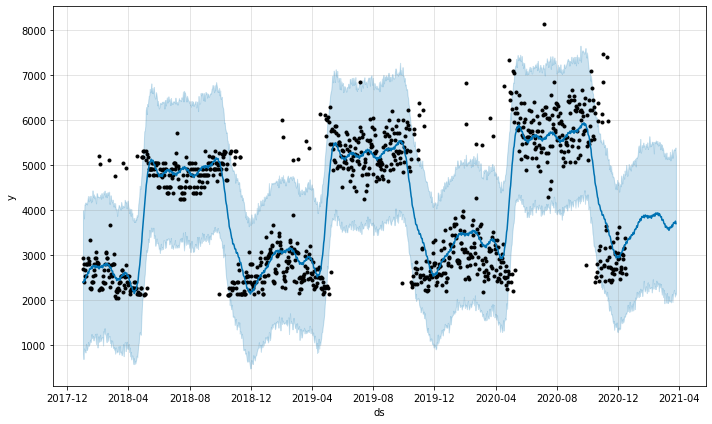

In [16]:
plot1 = m.plot(forecast)

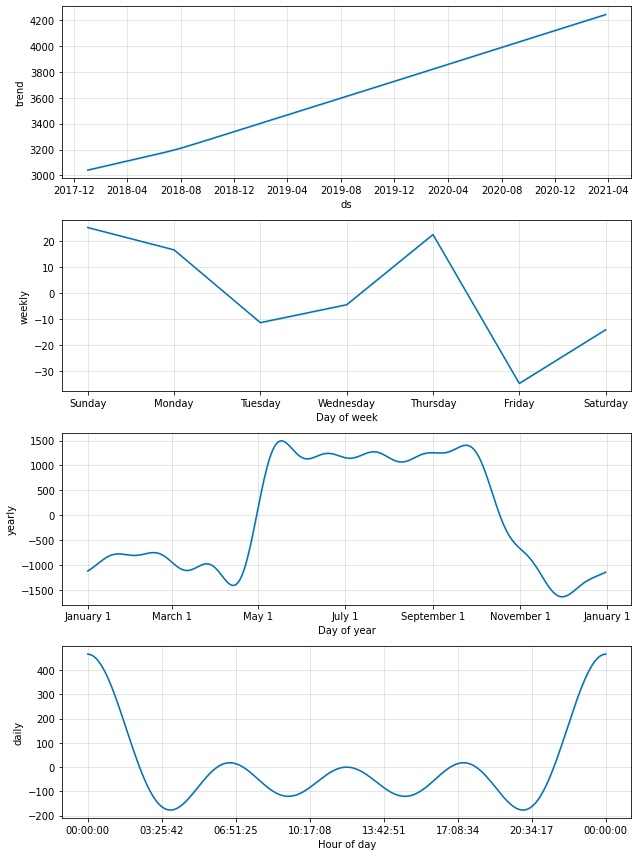

In [17]:
plt2 = m.plot_components(forecast)